In [1]:
path_to_dodem = '/Users/jmdunca2/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

import all_nu_analysis as ana
import time_interval_selection as tis

import pickle
import importlib

import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u




def get_good_stats(all_time_intervals, flarestarts, flarestops, check_acc=True):
    
    accthreshold=95
    
    all_good_times=[]
    total_duration=0*u.s
    orbit_durations=[]
    for at in range(0, len(all_time_intervals)):
        orbit_good_times=[]
        orbit_duration=0*u.s
        for tr in all_time_intervals[at]:
            #print(tr)
            if check_acc:
                meanevsum, checkacc = ana.check_avg_rej(tr, id_dirs[at], threshold=accthreshold)
                flare = ana.check_for_flare(tr, flarestarts, flarestops)
                if checkacc and flare == False:
                    print(tr[0].strftime('%Y-%m-%d %H:%M:%S'), tr[1].strftime('%H:%M:%S'))
                    dur = (tr[1]-tr[0]).to(u.s)
                    orbit_duration += dur
                    print(orbit_duration)
                    orbit_good_times.append(tr)
            else:
                flare = ana.check_for_flare(tr, flarestarts, flarestops)
                if flare == False:
                    print(tr[0].strftime('%Y-%m-%d %H:%M:%S'), tr[1].strftime('%H:%M:%S'))
                    dur = (tr[1]-tr[0]).to(u.s)
                    orbit_duration += dur
                    print(orbit_duration)
                    orbit_good_times.append(tr)
                
                
        orbit_durations.append(orbit_duration)
                
        all_good_times.append(orbit_good_times)
        total_duration+=orbit_duration

    print('Total duration: ', total_duration.to(u.min))
    for at in range(0, len(all_time_intervals)):
        print('Orbit ', at, '– good intervals: ', len(all_good_times[at]), ' duration: ', orbit_durations[at].to(u.min))

    return all_good_times

    


In [2]:
file = '/Users/jmdunca2/do-dem/reference_files/all_targets_postghost_postshut.pickle'
missing_last=False

In [3]:
with open(file, 'rb') as f:
    all_targets = pickle.load(f)


all_targets['25-feb-22']

{'NOAA_ARID': ['AR12955'],
 'HARP': [8032],
 'datapaths': ['/Users/jmdunca2/nustar/feb-2022/20622002001/',
  '/Users/jmdunca2/nustar/feb-2022/20622003001/',
  '/Users/jmdunca2/nustar/feb-2022/20622004001/'],
 'obsids': ['20622002001', '20622003001', '20622004001'],
 'working_dir': '/Users/jmdunca2/do-dem/DEM_folders//initial_dem_25feb22/',
 'loc': ['disk'],
 'hale_class': [''],
 'method': 'input',
 'notes': '',
 'goes_satellite': 16,
 'orbit durations': [<Quantity 59.51666667 min>,
  <Quantity 59.53333333 min>,
  <Quantity 59.53333332 min>],
 'total duration': <Quantity 178.58333332 min>,
 'total livetime': <Quantity 2.24198519 min>,
 'Region Coordinates': [{'centerx': -280.0, 'centery': 480.0, 'radius': 150.0},
  {'centerx': -450.0, 'centery': 280.0, 'radius': 150.0},
  {'centerx': -650.0, 'centery': 450.0, 'radius': 150.0}],
 'region_stats': [[5, 7, 15], [4, 7, 20], [4, 8, 21]],
 'directories': ['/Users/jmdunca2/do-dem/DEM_folders//initial_dem_25feb22/region_0/',
  '/Users/jmdunca2/d

['/Users/jmdunca2/do-dem/DEM_folders//initial_dem_11dec22_2/region_0/']
22-18-07 23-15-41
Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20221211_v2-2-1.nc:   0%|          | 0.00/3.37M [00:00<?, ?B/s]

/Users/jmdunca2/nustar/dec-2022/20801016001//event_cl/nu20801016001A06_cl.evt
/Users/jmdunca2/nustar/dec-2022/20801016001/event_cl/nu20801016001A06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_20801016001_fpmA_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/dec-2022/20801016001/event_cl/nu20801016001A06_cl_sunpos.evt
/Users/jmdunca2/nustar/dec-2022/20801016001//event_cl/nu20801016001B06_cl.evt
/Users/jmdunca2/nustar/dec-2022/20801016001/event_cl/nu20801016001B06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_20801016001_fpmB_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/dec-2022/20801016001/event_cl/nu20801016001A06_cl_sunpos.evt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2022-12-11 22:18:43.501848+00:00
2022-12-11 23:01:57.501848+00:00

2022-12-11 23:02:17.501848+00:00
2022-12-11 23:11:17.501848+00:00

2022-12-11 23:11:29.501848+00:00
2022-12-11 23:14:35.501848+00:00

23-54-39 00-55-44
Using 1s GOES flux ("flx1s")


Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

sci_xrsf-l2-flx1s_g16_d20221212_v2-2-1.nc:   0%|          | 0.00/3.34M [00:00<?, ?B/s]

2022-12-11 23:54:39.141 2022-12-12 00:55:43.152
/Users/jmdunca2/nustar/dec-2022/20801017001//event_cl/nu20801017001A06_cl.evt
/Users/jmdunca2/nustar/dec-2022/20801017001/event_cl/nu20801017001A06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_20801017001_fpmA_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/dec-2022/20801017001/event_cl/nu20801017001A06_cl_sunpos.evt
/Users/jmdunca2/nustar/dec-2022/20801017001//event_cl/nu20801017001B06_cl.evt
/Users/jmdunca2/nustar/dec-2022/20801017001/event_cl/nu20801017001B06_cl_sunpos.evt
d
Loading coordinates from pickle: ./centroid_coordinates/d_20801017001_fpmB_3s_RAW_centroid.pkl
/Users/jmdunca2/nustar/dec-2022/20801017001/event_cl/nu20801017001A06_cl_sunpos.evt


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2022-12-11 23:55:15.500332+00:00
2022-12-12 00:54:01.500332+00:00



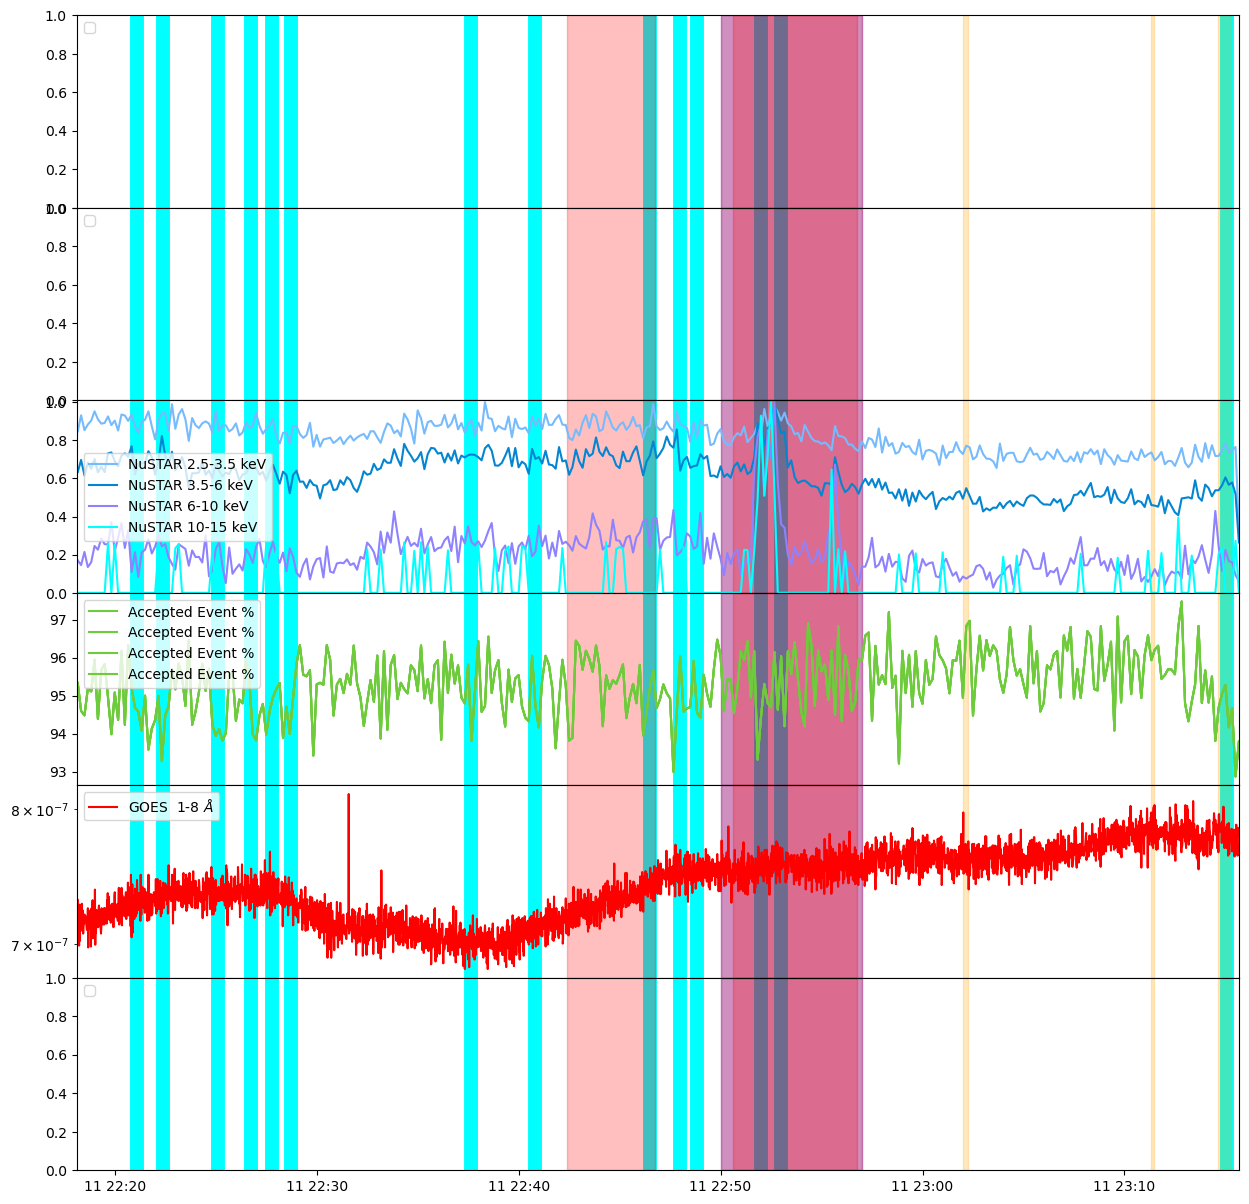

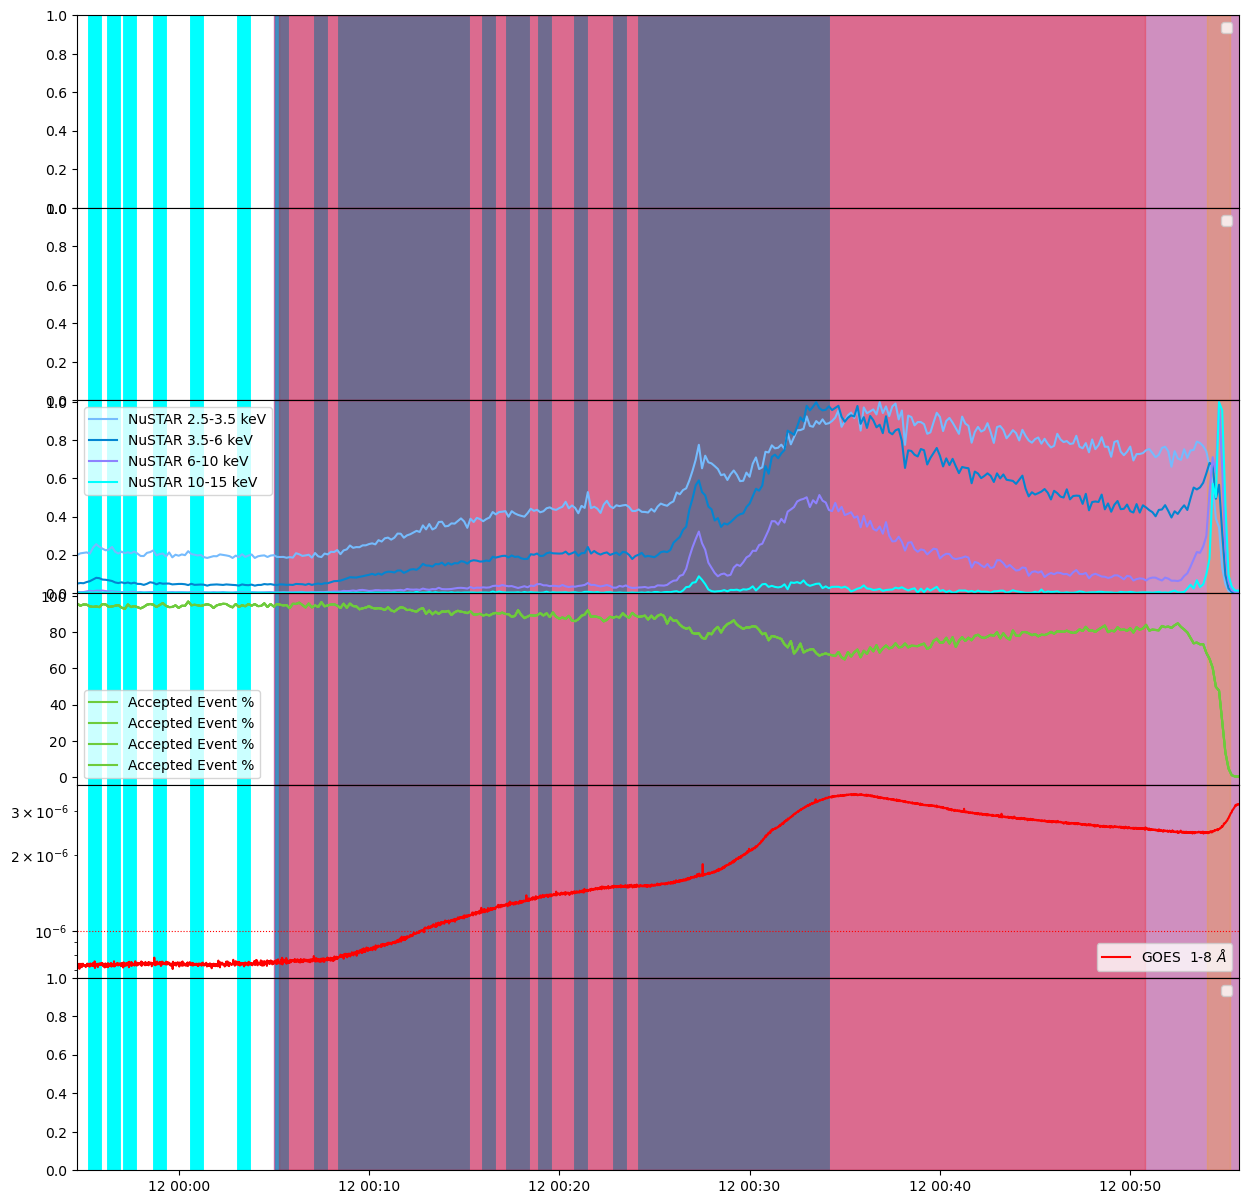

In [9]:
#keys = ['24-feb-22', '25-feb-22', '27-feb-22', '03-jun-22', '06-sep-22']
#keys = ['09-dec-22']#, 
#keys = ['10-dec-22']#, '18-mar-23_1','18-mar-23_2']
keys = ['11-dec-22_2']#, 
keys = ['17-nov-21_1', '17-nov-21_2', '19-nov-21', '20-nov-21', '21-nov-21', '22-nov-21']
keys = ['22-nov-21_1']
keys = ['03-jun-22_2']
keys = ['14-jan-21']
#keys = [#'17-nov-21_1',
       #'09-dec-22', #has good intervals if you allow times with >90% accepted instead of %95
       #'10-dec-22', 
       # '06-sep-22'
      #]

keys = ['17-nov-21_1', #'03-jun-22_1', '06-sep-22','19-nov-21', '20-nov-21', 
        '22-nov-21_1', #'22-nov-21_2',
          '03-jun-22_2', '09-dec-22']
keys = ['09-dec-22']
keys = ['29-jan-20']

keys = ['19-nov-21']

keys = ['29-may-18_2', '10-oct-17', '26-jul-16_1', '26-jul-16_2', '27-jul-16_1']
keys = ['11-dec-22_2']


with open(file, 'rb') as f:
    data = pickle.load(f)

#keys = list(data.keys())


for key in keys:

    
    ana.post_tis_info_dump(key, file)
    
    with open(file, 'rb') as f:
        data = pickle.load(f)
    
    ARDict = data[key]
    
    id_dirs = ARDict['datapaths']
    #obsids = ARDict['obsids']
    working_dir = ARDict['working_dir']
    #prepped_aia_dir = ARDict['prepped_aia']
    method=ARDict['method']
    # if method=='double':
    #     gauss_stats = ARDict['gauss_stats']
    #     sep_axis = gauss_stats[0][0]
    # else:
    #     sep_axis = ''

    
    if method in ['input', 'double']:
        directories = ARDict['directories'] #ana.get_region_directories(key, targets_file=file)
        all_all_time_intervals, fixit = tis.region_time_intervals(directories, id_dirs, shush=True)
    
    if method=='fit':
        onegauss=True
        regfile=path_to_dodem+'starter_region.reg'
        all_time_intervals, all_time_intervals_list = tis.find_all_intervals(working_dir, shush=True) 


    ana.make_summary_lcs(key, file, flarepath='/Users/jmdunca2/do-dem/reference_files/',
                     show=True, goes=True,
                    accthreshold=95, pre_dem_nustar_only=True,
                        xtraname='ghost_corr')

In [7]:
key
data['25-feb-22']

{'NOAA_ARID': ['AR12955'],
 'HARP': [8032],
 'datapaths': ['/Users/jmdunca2/nustar/feb-2022/20622002001/',
  '/Users/jmdunca2/nustar/feb-2022/20622003001/',
  '/Users/jmdunca2/nustar/feb-2022/20622004001/'],
 'obsids': ['20622002001', '20622003001', '20622004001'],
 'working_dir': '/Users/jmdunca2/do-dem/DEM_folders//initial_dem_25feb22/',
 'loc': ['disk'],
 'hale_class': [''],
 'method': 'input',
 'notes': '',
 'goes_satellite': 16,
 'orbit durations': [<Quantity 59.51666667 min>,
  <Quantity 59.53333333 min>,
  <Quantity 59.53333332 min>],
 'total duration': <Quantity 178.58333332 min>,
 'total livetime': <Quantity 2.24198519 min>,
 'Region Coordinates': [{'centerx': -280.0, 'centery': 480.0, 'radius': 150.0},
  {'centerx': -450.0, 'centery': 280.0, 'radius': 150.0},
  {'centerx': -650.0, 'centery': 450.0, 'radius': 150.0}]}

In [12]:
ARDict['per_region_all_time_intervals']

[[[<Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 13, 50)
    datetime.datetime(2020, 1, 30, 13, 27, 55)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 27, 55)
    datetime.datetime(2020, 1, 30, 13, 28, 35)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 28, 35)
    datetime.datetime(2020, 1, 30, 13, 30, 20)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 30, 20)
    datetime.datetime(2020, 1, 30, 13, 31, 40)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 31, 40)
    datetime.datetime(2020, 1, 30, 13, 33, 35)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 33, 35)
    datetime.datetime(2020, 1, 30, 13, 34, 50)]>,
   <Time object: scale='utc' format='datetime' value=[datetime.datetime(2020, 1, 30, 13, 34, 50)
    datetime.datetime

In [4]:
flare_res = ana.get_saved_flares(flarepath='/Users/jmdunca2/do-dem/reference_files/', 
                                                 add_stdv_flares=True, add_manual_flares=True)

In [5]:
flare_res

[[datetime.datetime(2015, 9, 1, 3, 58, 36),
  datetime.datetime(2017, 3, 21, 17, 12, 36),
  datetime.datetime(2017, 3, 21, 19, 3, 53),
  datetime.datetime(2017, 8, 21, 18, 58, 46),
  datetime.datetime(2017, 9, 11, 21, 10, 20),
  datetime.datetime(2017, 10, 10, 1, 53, 43),
  datetime.datetime(2018, 5, 29, 16, 44),
  datetime.datetime(2018, 5, 29, 16, 6, 6),
  datetime.datetime(2018, 5, 29, 16, 16, 48),
  datetime.datetime(2018, 5, 29, 17, 38, 12),
  datetime.datetime(2018, 5, 29, 17, 45, 36),
  datetime.datetime(2018, 5, 29, 23, 7, 58),
  datetime.datetime(2018, 9, 9, 9, 12, 19),
  datetime.datetime(2018, 9, 9, 10, 55, 11),
  datetime.datetime(2018, 9, 9, 11, 3, 47),
  datetime.datetime(2018, 9, 9, 10, 31, 11),
  datetime.datetime(2019, 4, 12, 17, 42, 35),
  datetime.datetime(2019, 4, 12, 20, 32, 54),
  datetime.datetime(2019, 4, 12, 20, 19, 6),
  datetime.datetime(2019, 4, 13, 3, 12),
  datetime.datetime(2019, 4, 13, 2, 40, 12),
  datetime.datetime(2019, 4, 13, 4, 40, 10),
  datetime.d

In [ ]:
keys = ['17-nov-21_1', '03-jun-22_1', '06-sep-22','19-nov-21', '20-nov-21', '22-nov-21_1', '22-nov-21_2',
          '03-jun-22_2', '09-dec-22', '14-jan-21']
keys = ['09-dec-22']

keys = ['29-may-18_2', '10-oct-17', '26-jul-16_1', '26-jul-16_2', '27-jul-16_1', '20-nov-21']



early_starts, late_stops = ana.get_saved_flares(flarepath='./reference_files/', add_stdv_flares=True, add_manual_flares=True)
all_all_good_times = []
for key in keys:
    print('')
    print('')
    print(key)
    
    with open(file, 'rb') as f:
        data = pickle.load(f)
    
    ARDict = data[key]
    
    id_dirs = ARDict['datapaths']
    #obsids = ARDict['obsids']
    working_dir = ARDict['working_dir']
    #prepped_aia_dir = ARDict['prepped_aia']
    method=ARDict['method']
    # if method=='double':
    #     gauss_stats = ARDict['gauss_stats']
    #     sep_axis = gauss_stats[0][0]
    # else:
    #     sep_axis = ''
    
    
    if method in ['input', 'double']:
        directories = ana.get_region_directories(key, targets_file=file)#, method=method)
        print(directories)
        all_all_time_intervals, fixit = tis.region_time_intervals(directories, id_dirs, shush=True)

        count=0
        for aat in all_all_time_intervals:
            print('Region ', count)
            all_good_times = get_good_stats(aat, early_starts, late_stops, check_acc=False)
            count+=1
            all_all_good_times.extend(all_good_times)

    
    
    if method=='fit':
        onegauss=True
        regfile=path_to_dodem+'starter_region.reg'
        all_time_intervals, all_time_intervals_list = tis.find_all_intervals(working_dir, shush=True) 

        all_good_times = get_good_stats(all_time_intervals, early_starts, late_stops, check_acc=False)

        all_all_good_times.extend(all_good_times)

In [ ]:
data = {'new_aia_times': all_all_good_times}

with open('oldnew_aia_times.pickle', 'wb') as f:
         # Pickle the 'data' dictionary using the highest protocol available.
         pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)   

In [ ]:
data['new_aia_times'][15]

In [ ]:
data['new_aia_times'][15]

In [ ]:
data['new_aia_times'][16]

In [ ]:
(60+40+17+24+9+18+32+13+22+19)/60

In [ ]:
# #Adding flares found for these observations using the standard-deviation-focused method to the list of all flares.
# #keys = ['24-feb-22', '25-feb-22', '27-feb-22', '03-jun-22', '06-sep-22']

# with open('/Users/jmdunca2/do-dem/reference_files/stdv_flares.pickle', 'rb') as f:
#     data = pickle.load(f)

# for kk in keys:
#     windows = ana.do_stdv_analysis(kk, file, show=True)
#     data['stdv_flares'].extend(windows)



# with open('/Users/jmdunca2/do-dem/reference_files/stdv_flares.pickle', 'wb') as f:
#          # Pickle the 'data' dictionary using the highest protocol available.
#          pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)  

In [ ]:
# #Specialized light curve for key that fails TIS.



# import time_interval_selection as tis
# import visualize_dem_results as viz
# import gauss2D as g2d
# import images_and_coalignment as iac
# import nustar_dem_prep as nu
# import lightcurves as lc
# import glob

# key='22-apr-16_1'

# with open(file, 'rb') as f:
#     data = pickle.load(f)

# ARDict = data[key]

# id_dirs = ARDict['datapaths']
# #obsids = ARDict['obsids']
# working_dir = ARDict['working_dir']
# #prepped_aia_dir = ARDict['prepped_aia']
# method=ARDict['method']


# nustar_acc_color='xkcd:apple'
# nustar_cts_color=['xkcd:sky blue', 'xkcd:cerulean', 'xkcd:periwinkle', 'xkcd:cyan']

# #NUSTAR - ALL-FOV, FINE TIME RESOLUTION ==========================================================================================

# #tr=newtimerange


# for datapath in id_dirs:

#     fig, axes = plt.subplots(6, 1, figsize=(15, 15), sharex=True)
#     plt.subplots_adjust(hspace=0)
    
#     evtA = glob.glob(datapath+'/event_cl/*A06_cl.evt')
#     evtB = glob.glob(datapath+'/event_cl/*B06_cl.evt')
#     hkA  = glob.glob(datapath+'/hk/*A_fpm.hk')
#     hkB  = glob.glob(datapath+'/hk/*B_fpm.hk')
    
#     #Load in the evt file (has the list of photons)
#     evtdataA, hdrA = lc.load_nufiles(evtA[0])
#     # Load in the hk file (has the livetime info)
#     lvdataA, lvhdrA = lc.load_nufiles(hkA[0])
#     evtdataB, hdrB = lc.load_nufiles(evtB[0])
#     lvdataB, lvhdrB = lc.load_nufiles(hkB[0])
    
    
#     eranges=[[2.5,3.5],[3.5,6.], [6.,10.], [10.,15.]]
#     labels = ['NuSTAR 2.5-3.5 keV', 'NuSTAR 3.5-6 keV', 'NuSTAR 6-10 keV', 'NuSTAR 10-15 keV']
#     eind=0
#     #     acc=0
#     for erange in eranges:
#         kevA = evtdataA['PI']*0.04+1.6
#         erange_evtdataA = evtdataA[np.where(np.logical_and(kevA > erange[0],kevA < erange[1]))]
#         kevB = evtdataB['PI']*0.04+1.6
#         erange_evtdataB = evtdataB[np.where(np.logical_and(kevB > erange[0],kevB < erange[1]))]
    
    
#         res = lc.get_a_nustar_lightcurve(erange_evtdataA, hdrA, lvdataA, lvhdrA, timebin=10, livetime_corr=True, event_stats=True)
#         times_converted, countrateA, lvt, counts, acc_sample, rej_sample, all_sample = res
      
#         #keepinds = np.nonzero(np.logical_and(times_converted > tr[0], times_converted < tr[1]))
#         #times_converted=times_converted[keepinds]
#         #countrateA=countrate[keepinds]   
    
#         #acc_sample=acc_sample[keepinds]
#         #rej_sample=rej_sample[keepinds]
#         evsumA=acc_sample/(acc_sample+rej_sample)*100
    
            
#         res = lc.get_a_nustar_lightcurve(erange_evtdataB, hdrB, lvdataB, lvhdrB, timebin=10, livetime_corr=True, event_stats=True)
#         times_converted, countrateB, lvt, counts, acc_sample, rej_sample, all_sample = res
    
    
#         #keepinds = np.nonzero(np.logical_and(times_converted > tr[0], times_converted < tr[1]))
#         #times_converted=times_converted[keepinds]
#         #countrateB=countrate[keepinds]
    
#         #acc_sample=acc_sample[keepinds]
#         #rej_sample=rej_sample[keepinds]
    
#         evsumB=acc_sample/(acc_sample+rej_sample)*100
    
    
#         #evsum = (np.array(evsumA)+np.array(evsumB))/2.
#         evsum = (np.array(evsumA)+np.array(evsumB))/2.
    
        
#         axes[3].plot(times_converted, evsum, label='Accepted Event %', color=nustar_acc_color)
    
#         totalrate = countrateA+countrateB
#         totalrate_vals = totalrate[np.isfinite(totalrate)]
#         maximum = np.nanmax(totalrate_vals) 
#         axes[2].plot(times_converted, totalrate/maximum, label=labels[eind], color=nustar_cts_color[eind]) 
    
    
#         eind+=1
    
# axes[2].set_ylim([0,1.01])
